## Preparando el entorno para análisis

In [1]:
# Importamos pandas para la manipulación de datos
import pandas as pd

# Importamos numpy para operaciones numéricas y de arrays
import numpy as np

# Importamos matplotlib y seaborn para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos los módulos de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuramos los estilos de los gráficos
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Carga y exploración de los datos

In [4]:
# Carga el dataset
df = pd.read_csv('usuarios_win_mac_lin.csv')
# Vemos las primeras 5 filas para una vista previa
print(df.head())
# Muestrando información del DataFrame
print(df.info())
# Describiendo las estadísticas de los datos
print(df.describe())

   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB
None
         duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1

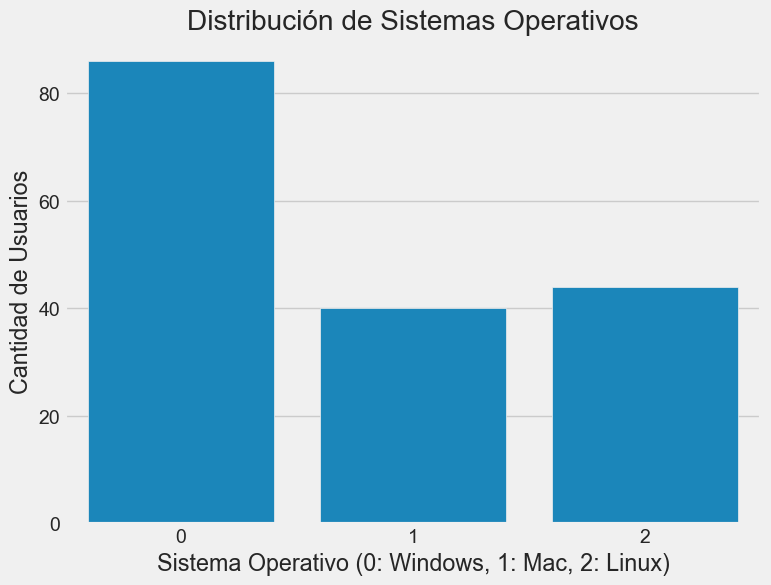

In [6]:
# Visualizamos la distribución de los sistemas operativos
plt.figure(figsize=(8, 6))
sns.countplot(x='clase', data=df)
plt.title('Distribución de Sistemas Operativos')
plt.xlabel('Sistema Operativo (0: Windows, 1: Mac, 2: Linux)')
plt.ylabel('Cantidad de Usuarios')
plt.show()

## Preparación de los datos para el modelo
* Nota: "train_test_split" es una función fundamental que evita el sobreajuste (overfitting). Al separar los datos, el modelo aprende de un conjunto y se valida en otro que no ha visto, lo que da una estimación más realista de su rendimiento.

In [7]:
# Definimos las características (X) y la etiqueta (y)
X = df[['duracion', 'paginas', 'acciones']] # Usamos solo las 3 primeras, la cuarta es la suma de las acciones
y = df['clase']

# Dividimos los datos en conjuntos de entrenamiento y prueba (80% para entrenar, 20% para probar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (136, 3)
Tamaño del conjunto de prueba: (34, 3)


## Creación y entrenamiento del modelo
Es el momento de crear el modelo de Regresión Logística y entrenarlo con los datos.

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Creamos una instancia del modelo de regresión logística
modelo_regresion_logistica = LogisticRegression(solver='liblinear')

# Envolvemos el modelo en la clase OneVsRestClassifier
model = OneVsRestClassifier(modelo_regresion_logistica)

# Entrenamos el modelo
model.fit(X_train, y_train)

print('¡El modelo ha sido entrenado exitosamente!')

¡El modelo ha sido entrenado exitosamente!


## Predicción y evaluación del modelo
Una vez entrenado, usamos el modelo para hacer predicciones en el conjunto de prueba y luego evaluamos su rendimiento

Precisión (Accuracy) del modelo: 0.50

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.00      0.00      0.00        12
           2       0.36      0.67      0.47         6

    accuracy                           0.50        34
   macro avg       0.31      0.49      0.38        34
weighted avg       0.33      0.50      0.40        34


Matriz de Confusión:


C:\Users\reicq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reicq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\reicq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


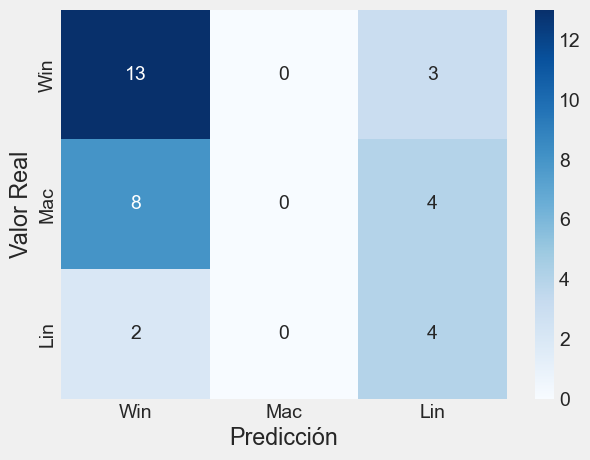

In [11]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Muestra el 'accuracy' del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión (Accuracy) del modelo: {accuracy:.2f}')

# Muestra el reporte de clasificación y la matriz de confusión
print('\nReporte de Clasificación:')
print(classification_report(y_test, y_pred))

print('\nMatriz de Confusión:')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Win', 'Mac', 'Lin'], yticklabels=['Win', 'Mac', 'Lin'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

### La matriz de confusión permite ver cuántas predicciones fueron correctas e incorrectas para cada clase, dando una visión más detallada que solo la precisión global.

## Experimentación y predicción con nuevos valores
Este es el paso final de la actividad, donde ponemos a prueba el modelo con datos nuevos que no ha visto antes.

In [14]:
# Creamos un DF con los nuevos datos de prueba
nuevos_datos_df = pd.DataFrame({
    'duracion': [100, 500, 200],
    'paginas': [5, 10, 8],
    'acciones': [20, 50, 30]
})

# Realizamos la predicción con el modelo
predicciones_nuevos = model.predict(nuevos_datos_df)

# Mapeamos los valores numéricos a las etiquetas de texto
mapeo_os = {0: 'Windows', 1: 'Macintosh', 2: 'Linux'}
predicciones_texto = [mapeo_os[p] for p in predicciones_nuevos]

# Muestra de las predicciones
print('\nPredicciones para los nuevos datos (usando DataFrame):')
for i, pred in enumerate(predicciones_texto):
    print(f'Datos de Usuario {i+1}: {nuevos_datos_df.iloc[i].values} -> Predicción: {pred}')


Predicciones para los nuevos datos (usando DataFrame):
Datos de Usuario 1: [100   5  20] -> Predicción: Windows
Datos de Usuario 2: [500  10  50] -> Predicción: Windows
Datos de Usuario 3: [200   8  30] -> Predicción: Windows


# CUESTIONARIO FINAL - REFLEXION DE LA ACTIVIDAD:

## ¿Cómo pudiste llevar adelante esta actividad? 

### La pude realizar siguiendo un flujo de trabajo estándar en ciencia de datos y aprendizaje automático. El proceso lo hice paso a paso: preparar el entorno, cargar y explorar los datos, preprocesar los datos para el modelo, entrenar el modelo, evaluar su rendimiento y usarlo para hacer predicciones. El uso de librerías como pandas, sklearn y matplotlib simplifica enormemente cada uno de estos pasos, permitiendo enfocarse en la lógica del problema.

## ¿Te pareció muy difícil o muy fácil? ¿Por qué?

### La actividad, paso a paso, resulta fácil de seguir. El desafío para mi, más allá del código, es comprender los conceptos sobre qué es la regresión logística, por qué se usa para clasificación, cómo la división de datos evita el sobreajuste y cómo interpretar métricas como la matriz de confusión. El código en sí es bastante directo una vez que se entiende el "esqueleto" de un proyecto de aprendizaje automático.
